In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("cats_vs_dogs.csv")
df.head()

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


In [5]:
print(df.columns)

Index(['Unnamed: 0', 'state', 'n_households', 'percent_pet_households',
       'n_pet_households', 'percent_dog_owners', 'n_dog_households',
       'avg_dogs_per_household', 'dog_population', 'percent_cat_owners',
       'n_cat_households', 'avg_cats_per_household', 'cat_population'],
      dtype='object')


In [7]:
df['target'] = (df['dog_population'] > df['cat_population']).astype(int)
df = df.drop(columns=['Unnamed: 0', 'state']) 

In [8]:
X = df.drop(columns='target')
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
print(X_train, X_test, y_train, y_test)

[[ 2.97805595e-02  4.43229440e-01  1.05189664e-01  4.43229420e-01
   1.27602858e-01  6.10278198e-02  1.41302152e-01  4.90169895e-01
   1.74577315e-01  8.40314306e-01  2.90129787e-01]
 [-1.67947264e-01  6.47293465e-01 -9.34243318e-02  8.37005069e-01
  -3.55364364e-02  6.10278198e-02 -4.49514567e-02  1.16828058e-01
  -1.21223866e-01 -7.43354963e-01 -2.08871977e-01]
 [-3.71703375e-01  2.97469423e-01 -3.50060394e-01  9.43021590e-01
  -2.70049172e-01  2.55299713e+00 -6.01276767e-02  1.70162606e-01
  -3.46596195e-01  8.40314306e-01 -3.12686491e-01]
 [ 2.09185671e+00 -3.58450655e-01  2.07942766e+00 -1.92869706e-01
   2.08640730e+00 -4.37366042e-01  1.92864697e+00 -7.72081078e-01
   1.90290136e+00  3.12424550e-01  1.99476411e+00]
 [ 4.24797413e+00 -5.77090681e-01  4.10796837e+00 -6.32081006e-01
   3.83335724e+00  6.10278198e-02  3.63735137e+00 -5.94299251e-01
   4.16789327e+00 -7.43354963e-01  3.89318552e+00]
 [-8.31862640e-01 -3.77786167e-02 -8.58125411e-01 -4.95774051e-01
  -8.64827848e-01 -

In [12]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - accuracy: 0.6119 - loss: 0.6944 - val_accuracy: 0.8000 - val_loss: 0.6200
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6461 - loss: 0.6318 - val_accuracy: 0.8000 - val_loss: 0.6147
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6082 - loss: 0.6776 - val_accuracy: 0.8000 - val_loss: 0.6092
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6357 - loss: 0.6320 - val_accuracy: 0.8000 - val_loss: 0.6046
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7628 - loss: 0.5552 - val_accuracy: 0.8000 - val_loss: 0.5992
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8112 - loss: 0.5712 - val_accuracy: 0.9000 - val_loss: 0.5939
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8178 - loss: 0.5499 - val_accuracy: 0.9000 - val_loss: 0.5892
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7011 - loss: 0.5627 - val_accuracy: 0.9000 - val_loss: 0.5848

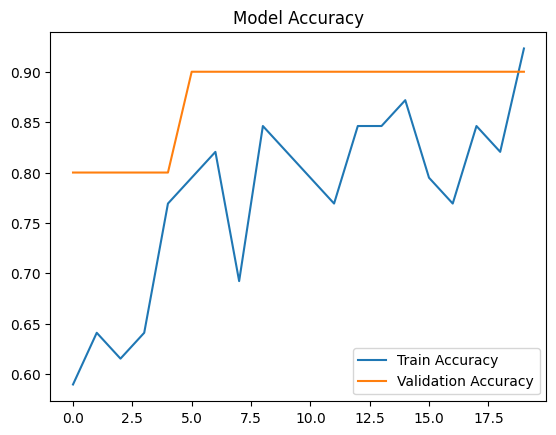

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [15]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10

[[9 0]
 [1 0]]


D:\folder desktop\New folder (5)\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\folder desktop\New folder (5)\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\folder desktop\New folder (5)\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
